In [2]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#define img and batch size
IMG_SIZE=224
BATCH_SIZE=32

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Alzheimer Data/train',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='training'

)

Found 3588 images belonging to 4 classes.


In [6]:
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Alzheimer Data/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
 subset='validation'
)



Found 895 images belonging to 4 classes.


In [8]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("class indices:",class_indices)
print("class names:",class_names)
class indices:{'Mild_Demented':0,'Moderate_Demented':1,'Non_Demented':2,'veryMild_Demented':3}
class names:['Mild_Demented','Moderate_Demented','Non_Demented','veryMild_Demented']

class indices: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
class names: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [13]:
#define the model
model=keras.Sequential(
    [
        layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128,(3,3),activation='relu'),
         layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(4,activation='softmax')

    ]
)

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5, validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 992s 9s/step - accuracy: 0.2869 - loss: 1.4110 - val_accuracy: 0.4849 - val_loss: 1.0144
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 150ms/step - accuracy: 0.5452 - loss: 0.9114 - val_accuracy: 0.5464 - val_loss: 0.8218
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 145ms/step - accuracy: 0.6118 - loss: 0.6771 - val_accuracy: 0.5676 - val_loss: 0.7792
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step - accuracy: 0.6462 - loss: 0.6062 - val_accuracy: 0.5609 - val_loss: 0.8513
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step - accuracy: 0.6859 - loss: 0.5203 - val_accuracy: 0.5419 - val_loss: 0.9763


In [18]:
model.save('/content/drive/MyDrive/Alzheimer Data/train/roshni.h5')

In [19]:
#load your model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/Alzheimer Data/train/roshni.h5')
print("model Loaded")

model Loaded


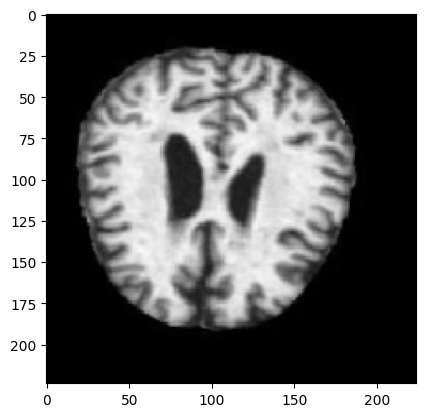

In [20]:
#load and view the test image
test_image_path="/content/drive/MyDrive/Alzheimer Data/train/NonDemented/006f96cd-965a-46d7-b0f5-522587addf5f.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [21]:
#preprocessing the image
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [22]:
#make prediction
prediction = model.predict(img_array)
# print the prediction
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
[[0.06010697 0.10107465 0.08302    0.75579834]]


In [23]:
prediction = model.predict(img_array)
ind=np.argmax(prediction)
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
VeryMildDemented
